**KEY TERMS:**

1) Contingency table : A table that shows the frequency of occurrence of each combination of values in a set of variables. A tally of counts between two or more categorical variables.


2) Hexagonal binning : A method of binning data into a hexagonal grid. A plot of two numeric variables with the records binned into hexagons.


3) Contour plot : A plot of two numeric variables with the records binned into hexagons and the number of records in each bin is plotted as a contour.


4) Violin plot : A plot of two numeric variables with the records binned into hexagons and the number of records in each bin is plotted as a violin. Similar to a boxplot but showing the density estimate

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [20]:
#load the dataset
data = pd.read_csv("D:\statistics\Dataset\kc_tax.csv")
data.head(10)


,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
6,259000.0,1770,98168.0
7,175000.0,1150,98168.0
8,178000.0,1980,98168.0
9,186000.0,1490,98168.0


In [5]:
#to get the shape of the dataset
data.shape

(498249, 3)

In [6]:
#to get the information about the columns from the dataset
data.columns

Index(['TaxAssessedValue', 'SqFtTotLiving', 'ZipCode'], dtype='object')

In [7]:
#by applying the condition to get the dataset with only the columns that are required.
data1 = data.loc[(data.TaxAssessedValue < 750000) & 
                     (data.SqFtTotLiving > 100) &
                     (data.SqFtTotLiving < 3500), :]
print(data1.shape)

(432693, 3)


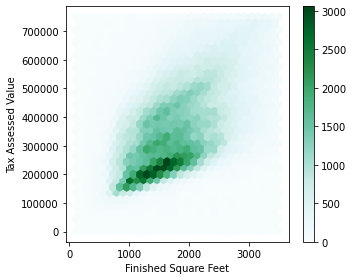

In [8]:
#ploting the hexagonal-binned scatter plot
ax = data1.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

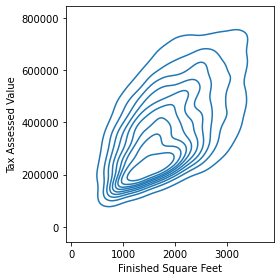

In [9]:
#ploting the kde plot for visualizing the distribution of the data
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=data1.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

In [10]:
#load the dataset
d1 = pd.read_csv("https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/lc_loans.csv")
d1.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [11]:
#to get the shape of the dataset
d1.shape

(450961, 2)

In [13]:
#This method is used to compute a simple cross-tabulation of two (or more) factors. 
# By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.
crosstab = d1.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)


status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


**KEY POINTS:**

• Hexagonal binning and contour plots are useful tools that permit graphical
  examination of two numeric variables at a time, without being overwhelmed by
  huge amounts of data.


• Contingency tables are the standard tool for looking at the counts of two catego‐
  rical variables.


• Boxplots and violin plots allow you to plot a numeric variable against a categori‐
  cal variable.


In [14]:
#load the dataset
d2 = pd.read_csv("https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/airline_stats.csv?raw=true")
d2.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


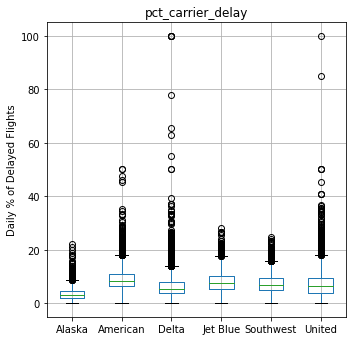

In [15]:
# This method is used to compute a simple cross-tabulation of two (or more) factors.
# plotting the bar plot
ax = d2.boxplot( column='pct_carrier_delay',figsize=(5, 5), by='airline')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

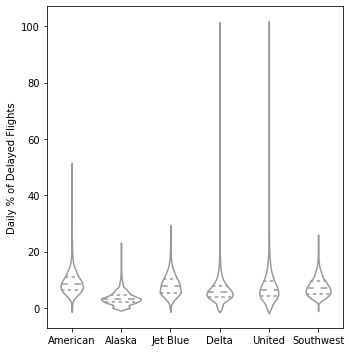

In [16]:
# plotting the violin plot for the data
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=d2, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

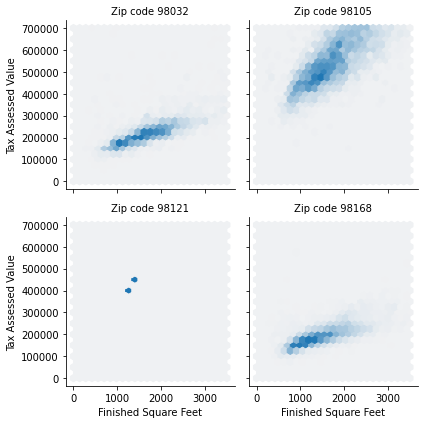

In [21]:
#plotting the hexagonal-binned scatter plot for specific zipcode and tax assessment value from the dataset
zip_codes = [98168, 98105, 98032, 98121]
DATA = data1.loc[data1.ZipCode.isin(zip_codes),:]
DATA


def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(DATA, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()
